In [1]:
import keras
from keras.models import load_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
model = load_model("./cnn_model/077-0.9942.h5")
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], 32*32*3))
X_test = scaler.transform(X_test.reshape(X_test.shape[0], 32*32*3))
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
model_clone = keras.models.clone_model(model)
model_clone.set_weights(model.get_weights())

model = keras.models.Sequential(model_clone.layers[:-6])
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5, name="dropout_4"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [5]:
for layer in model.layers[:-3]:
    layer.trainable = False

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
result1 = model.fit(X_train, y_train, epochs=3, batch_size=1024, validation_data=[X_test, y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 9s 175us/step - loss: 0.3376 - accuracy: 0.9196 - val_loss: 0.2767 - val_accuracy: 0.9133
Epoch 2/3
50000/50000 [==============================] - 5s 93us/step - loss: 0.0517 - accuracy: 0.9856 - val_loss: 0.2760 - val_accuracy: 0.9168
Epoch 3/3
50000/50000 [==============================] - 5s 93us/step - loss: 0.0342 - accuracy: 0.9911 - val_loss: 0.2839 - val_accuracy: 0.9196


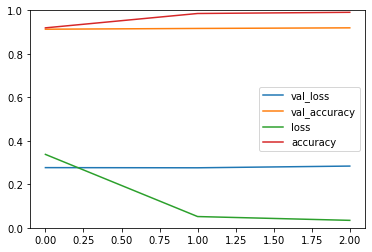

In [6]:
pd.DataFrame(result1.history).plot()
plt.gca().set_ylim(0,1)
plt.show()

In [7]:
%%time
for layer in model.layers[:-3]:
    layer.trainable = True

#optimizer = keras.optimizers.SGD(lr=1e-4) # default lr = 1e-2
optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999) # default lr = 0.001
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
result2 = model.fit(X_train, y_train, epochs=5, batch_size=1024, validation_data=[X_test, y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 19s 383us/step - loss: 0.0259 - accuracy: 0.9934 - val_loss: 0.2701 - val_accuracy: 0.9237
Epoch 2/5
50000/50000 [==============================] - 15s 301us/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.2686 - val_accuracy: 0.9250
Epoch 3/5
50000/50000 [==============================] - 15s 301us/step - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.2688 - val_accuracy: 0.9247
Epoch 4/5
50000/50000 [==============================] - 15s 301us/step - loss: 0.0179 - accuracy: 0.9956 - val_loss: 0.2701 - val_accuracy: 0.9246
Epoch 5/5
50000/50000 [==============================] - 15s 303us/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.2732 - val_accuracy: 0.9249
Wall time: 1min 21s


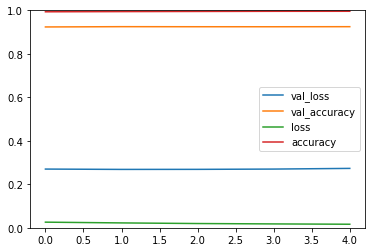

In [8]:
pd.DataFrame(result2.history).plot()
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 169us/step


[0.2732248047560453, 0.9248999953269958]

In [10]:
# uniform noise 모델 성능 평가
# FGSM 모델 성능 평가
# GAN 모델 성능 평가
# randomization model로 mitigation 가능한지